# Flight Delays in US in 2008
## by Donia Sharafeldin

## Preliminary Wrangling
> flight data tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in this data.

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## loading Data

data from https://www.kaggle.com/vikalpdongre/us-flights-data-2008

In [50]:
df = pd.read_csv("2008.csv")


In [51]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [52]:
df.shape

(7009728, 29)

### What is the structure of your dataset?

> Data consists of 7009728 rows and 29 column

### What is/are the main feature(s) of interest in your dataset?

> i think that arrival results from all other delays departure delay , weather delay , security delay, late air craft delay and Nas delay

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All delays , dates, causes of cancellation

In [53]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

Null values comes from  that only cancelled flights have cancell reason and only delayed flights has delay reason

## create a new column that contains the dates of departure:

In [54]:
df['DepDate'] = pd.to_datetime(df.Year*10000 + df.Month * 100 + df.DayofMonth, format ='%Y%m%d')

In [55]:
df.drop(['FlightNum','TailNum','ActualElapsedTime','CRSArrTime'],axis = 1, inplace = True)

In [56]:
df.drop (['Year', 'DayofMonth','DepTime','ArrTime','CRSElapsedTime'],axis=1, inplace = True)

In [57]:
df['CancellationCode'].unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

## cancellation Code
    (A = carrier, B = weather, C = NAS, D = security)

In [58]:
df.loc[df["CancellationCode"] =="A", 'CancellationCode'] = "0"
df.loc[df["CancellationCode"] =="B", 'CancellationCode'] = "1"
df.loc[df["CancellationCode"] =="C", 'CancellationCode'] = "2"
df.loc[df["CancellationCode"] =="D", 'CancellationCode'] = "3"
df["CancellationCode"].unique()

array([nan, '0', '2', '1', '3'], dtype=object)

## Categorizing Delays:
     (0) on time
     (1) slightly delayed
     (2) highly delayed 
     (3) diverted
     (4) cancelled 

In [59]:
for _ in df:
    df.loc[df['ArrDelay'] <= 15, 'case'] = 0
    df.loc[df['ArrDelay'] >= 15, 'case'] = 1
    df.loc[df['ArrDelay'] >= 60, 'case'] = 2
    df.loc[df['Diverted'] == 1, 'case'] = 3
    df.loc[df['Cancelled'] == 1, 'case'] = 4

In [60]:
df.drop(['Cancelled', 'Diverted'],axis = 1, inplace =True )

## Univariate Exploration


In [61]:
CancelledFlights = df[(df.case == 4)]

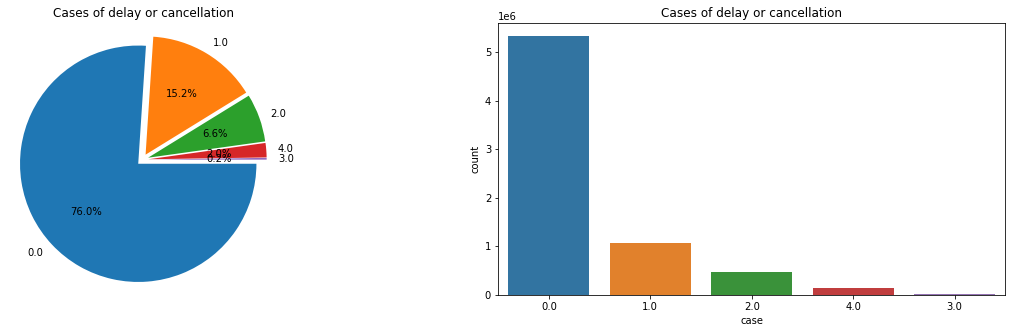

In [73]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
cancelled = df.case.value_counts()
plt.pie(cancelled, labels = cancelled.index,startangle =0,
        counterclock = False,autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05])
plt.title('Cases of delay or cancellation')
plt.axis('square')
plt.subplot(1, 2, 2)
sb.countplot('case',order =cancelled.index, data=df)
plt.title('Cases of delay or cancellation')
plt.show()



###  pie shows that 76% of flights arrived on time, 15.2% arrived with delay of more than 15 min, 6.6% arrived with delay more than one hour, 0.2% was diverted and 2% was cancelled



## Examining cancellation causes

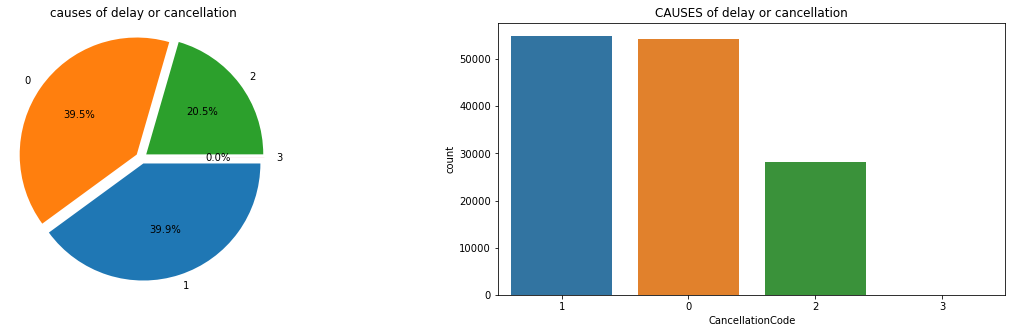

0 = carrier, 1 = weather, 2 = NAS, 3 = security


In [63]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
code = df.CancellationCode.value_counts()
plt.pie(code, labels = code.index,startangle =0,
        counterclock = False,autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05
                                                       ])
plt.axis('square')
plt.title('causes of delay or cancellation')
plt.subplot(1, 2, 2)
sb.countplot('CancellationCode',order =code.index, data=df)
plt.title('CAUSES of delay or cancellation')
plt.show()
print(('0 = carrier, 1 = weather, 2 = NAS, 3 = security'))

### 39.9% of cancellation due to weather 
### Security cancellations are alomost 0% 

### this figure shows that cancellations was at its peak March,feb  and december

In [64]:
Delayedflights = df[(df.case >= 1) &(df.case < 3)]

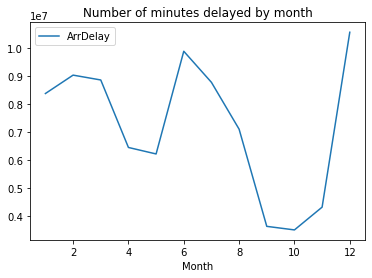

In [65]:
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot()
plt.title('Number of minutes delayed by month')
plt.show()

## studying the relation between taxi out and Dep delay
taxi out phase includes a lot of things happening in the cabin. The flight attendants are making sure the cabin is ready for takeoff and conducting the emergency brief. The pilots are starting the engines and requesting permission to taxi.

Text(0.5, 0, 'Departure dely')

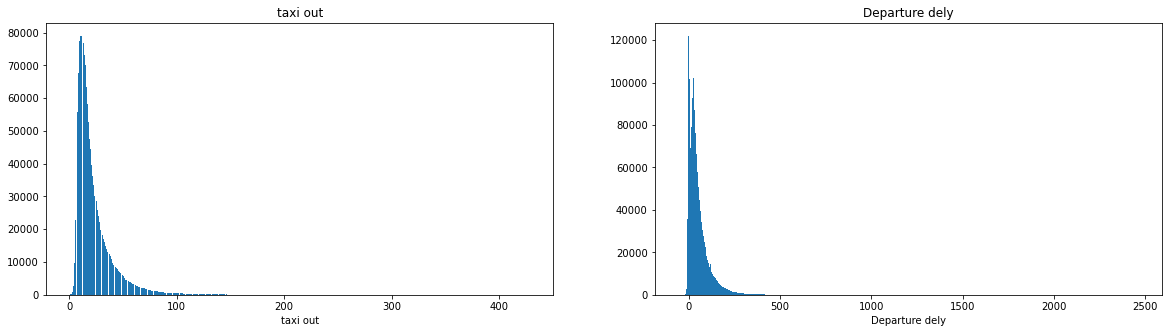

In [66]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1,2,1)
plt.hist(Delayedflights['TaxiOut'],bins = 500);
plt.title('taxi out')
plt.xlabel('taxi out')

plt.subplot(1,2,2)
plt.hist(Delayedflights['DepDelay'],bins=500);
plt.title('Departure dely')
plt.xlabel('Departure delay')


In [67]:
df.UniqueCarrier.value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

## Bivariate Exploration


## investigating correlation between Taxi out and dep delay

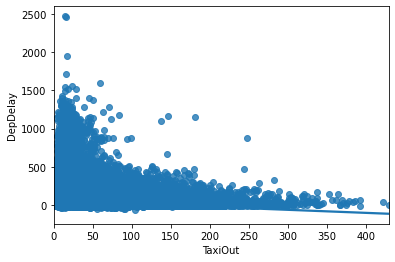

In [68]:
sb.regplot(x = Delayedflights['TaxiOut'], y =Delayedflights['DepDelay'] )

In [69]:
r = np.corrcoef(x = Delayedflights['TaxiOut'], y =Delayedflights['DepDelay'])
r

array([[ 1.        , -0.12623619],
       [-0.12623619,  1.        ]])

## IT Turns out that the correlation between the two variables is negative but very small correlation

## Relation between each carrier and carrier delay

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


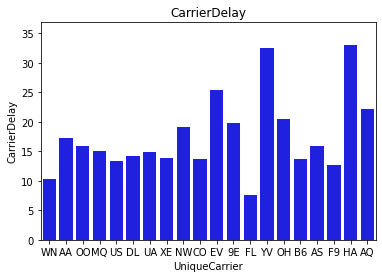

In [74]:
order =['WN','AA','OO','MQ','US','DL','UA','XE','NW','CO','EV','9E','FL','YV','OH','B6','AS','F9',
  'HA','AQ']
plt.title("CarrierDelay")
sb.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,order =['WN','AA','OO','MQ','US','DL','UA','XE','NW','CO','EV','9E','FL','YV','OH','B6','AS','F9',
  'HA','AQ'], errwidth=0,color = "blue")

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

### If you are in US and you decided to travel, Avoide Hawaiian Airlines(HA) and Mesa Airlines (YV), but i recommend AirTran Airways(FL) and Southwest Airlines(WN)

# Relation between Actual dep time and arrdelay

Text(0, 0.5, 'ArrDelay')

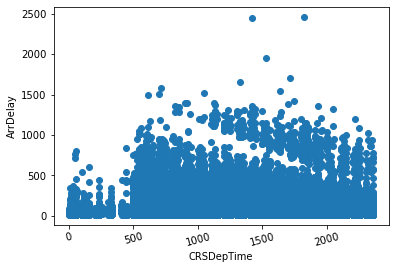

In [71]:
plt.scatter(data=Delayedflights,x='CRSDepTime',y='ArrDelay', color=sb.color_palette()[0])
plt.xticks(rotation=15);
plt.xlabel('CRSDepTime')
plt.ylabel('ArrDelay')

## arrival delays increases by time , may be due to accumulation od delays in flights

## Multivariate Exploration


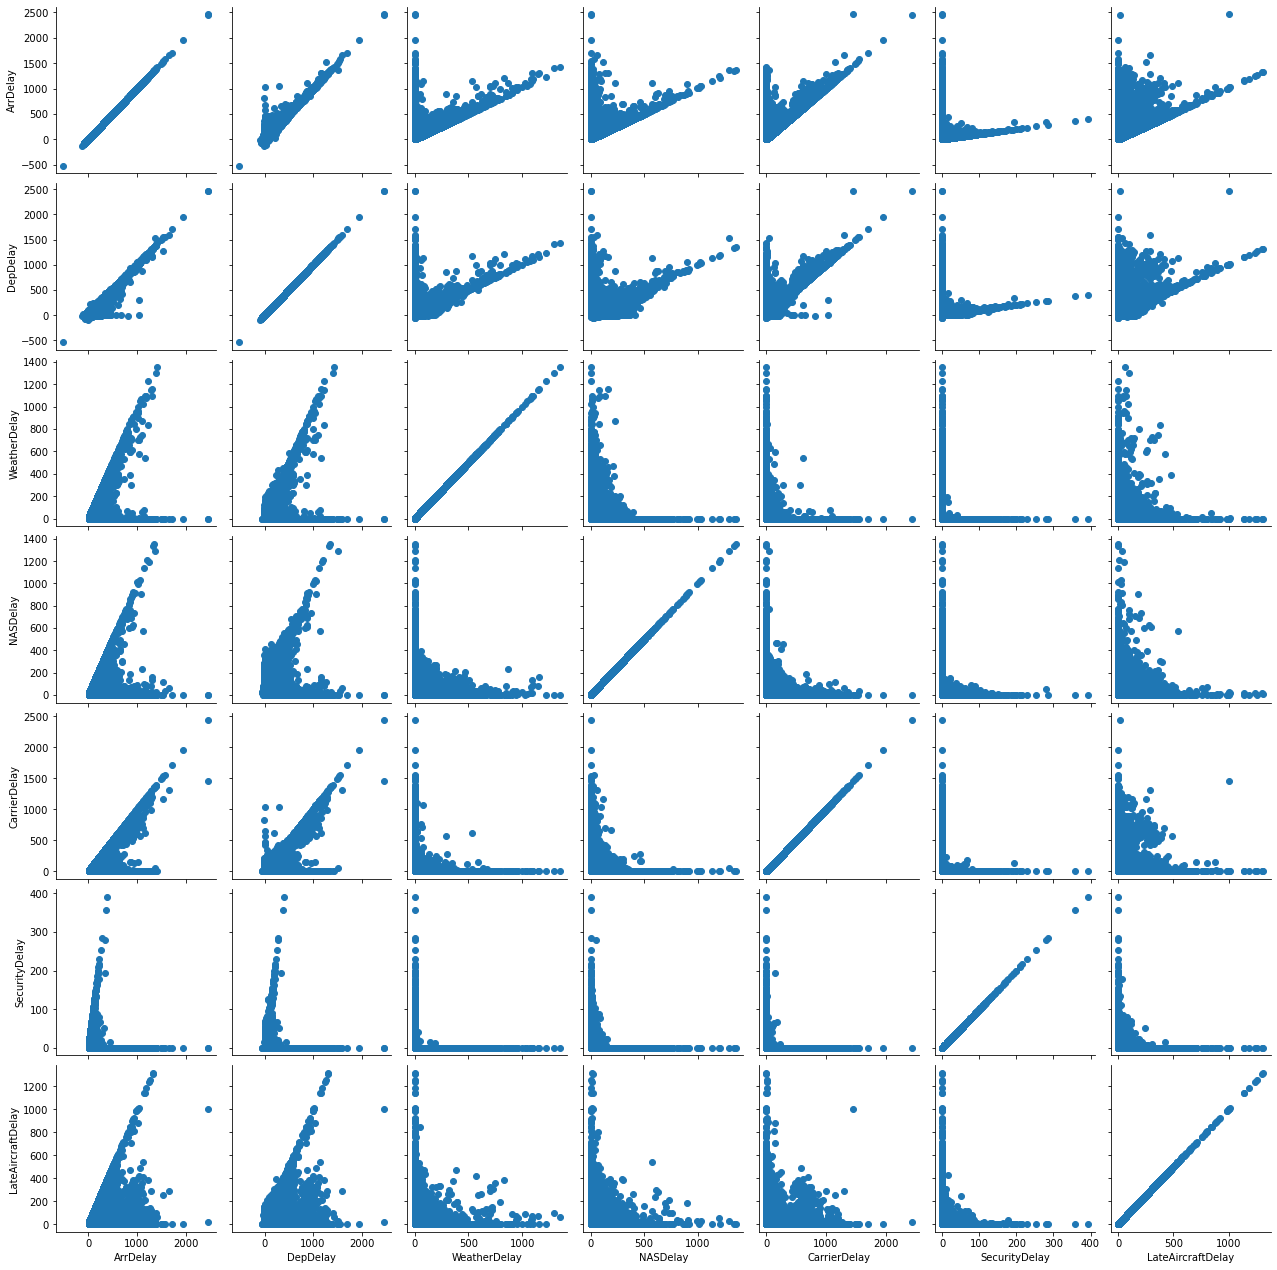

In [72]:
g = sb.PairGrid(data = df, vars = ['ArrDelay', 'DepDelay', 'WeatherDelay','NASDelay','CarrierDelay','SecurityDelay','LateAircraftDelay'])
g.map(plt.scatter)

    All delays variables show correlation with Arrdelay which make sense
    DepDelay and ArrDelay shows correlation wit CarrierDelay